In [154]:
# Importing Essential Files
import numpy as np
import pandas as pd
import  _pickle as cpickle
import matplotlib.pyplot as plt
import seaborn as sb
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing import sequence
from keras.utils import to_categorical
import os

In [155]:
# New Coloumn Names to the Given tsv Format
cols = ['Sno','Label','Statement','Subject','Speaker','job title','State_info','Party_aff','barely_true_count','false_counts','half_true_counts','mostly_true_counts','pants_on_fire_counts','venue']

# Reading train.tsv File Along with the Columns
train_df = pd.read_csv('Dataset/train.tsv', sep='\t',names = cols)

# Reading test.tsv File Along with the Columns
test_df = pd.read_csv('Dataset/test.tsv', sep='\t',names = cols)

# Reading valid.tsv File Along with the Columns
valid_df = pd.read_csv('Dataset/valid.tsv', sep='\t',names = cols)

# Diplaying Original Data
train_df.head()


,Sno,Label,Statement,Subject,Speaker,job title,State_info,Party_aff,barely_true_count,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,venue
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [156]:
''' Dataset - Filtering
    1. Drop Useless Columns,
        i. Sno
        ii. barely_true_count
        iii. false_counts
        iv. half_true_counts
        v. mostly_true_counts
        vi. pants_on_fire_counts
    2. Converting Multinary Classification to Binary Classification
        The Given Dataset Contains 6 Classes as Labels - True, Mostly-True, 
        Half-True, Barely-True, False, Pants-Fire. So converting into Binary-Classification such that:
    
         # Previous-Label    :    Converted-Label
             True            --        True
             Mostly-true     --        True
             Half-true       --        True
             Barely-true     --        False
             False           --        False
             Pants-fire      --        False '''

' Dataset - Filtering\n    1. Drop Useless Columns,\n        i. Sno\n        ii. barely_true_count\n        iii. false_counts\n        iv. half_true_counts\n        v. mostly_true_counts\n        vi. pants_on_fire_counts\n    2. Converting Multinary Classification to Binary Classification\n        The Given Dataset Contains 6 Classes as Labels - True, Mostly-True, \n        Half-True, Barely-True, False, Pants-Fire. So converting into Binary-Classification such that:\n    \n         # Previous-Label    :    Converted-Label\n             True            --        True\n             Mostly-true     --        True\n             Half-true       --        True\n             Barely-true     --        False\n             False           --        False\n             Pants-fire      --        False '

In [157]:
# Dropping Some Useless Columns from the Dataset
def drop_useless(data):
    data = data.drop(['Sno'],axis=1)
    data = data.drop(['barely_true_count'],axis=1)
    data = data.drop(['false_counts'],axis=1)
    data = data.drop(['half_true_counts'],axis=1)
    data = data.drop(['mostly_true_counts'],axis=1)
    data = data.drop(['pants_on_fire_counts'],axis=1)
    return data

In [158]:
# Converting Six Class Classification to Binary Classification 
def change_Label(data):
    data.Label[data.Label == 'false'] = False
    data.Label[data.Label == 'half-true'] = True
    data.Label[data.Label == 'true'] = True
    data.Label[data.Label == 'mostly-true'] = True
    data.Label[data.Label == 'barely-true'] = True
    data.Label[data.Label == 'pants-fire'] = False
    return data

In [159]:
# Call the Function to Drop Colomns
# Note: Run this code only once Otherwise it will give Error.
# Solution : If error is Flashing, then re-Run the Upper Cells again.
train_df = drop_useless(train_df)
test_df = drop_useless(test_df)
valid_df = drop_useless(valid_df)

In [160]:
# Call the Function to Change the Labels
train_df = change_Label(train_df)
test_df = change_Label(test_df)
valid_df = change_Label(valid_df)

In [161]:
# Training Dataset - After Changes
train_df.head()

,Label,Statement,Subject,Speaker,job title,State_info,Party_aff,venue
0,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,a mailer
1,True,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,a floor speech.
2,True,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,Denver
3,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,a news release
4,True,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,an interview on CNN


In [162]:
# Testing Dataset - After Changes
test_df.head()

,Label,Statement,Subject,Speaker,job title,State_info,Party_aff,venue
0,True,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,Radio interview
1,False,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,a news conference
2,False,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,comments on ABC's This Week.
3,True,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,a radio show
4,False,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,a web video


In [163]:
# Validation Dataset - After Changes
valid_df.head()
print(valid_df.shape)

(1284, 8)


In [164]:
# Saving tsv to csv File in the Directory
train_df.to_csv('train_data.csv', sep='\t', encoding='utf-8',index=False)
test_df.to_csv('test_data.csv', sep='\t', encoding='utf-8',index=False)
valid_df.to_csv('valid_data.csv', sep='\t', encoding='utf-8',index=False)

In [165]:
# Reading the New CSV Files from the Directory
trainData = pd.read_csv('./train_data.csv',sep='\t')
testData = pd.read_csv('./test_data.csv',sep='\t')
validData = pd.read_csv('./valid_data.csv',sep='\t')

In [166]:
# PLotting Count-Plot of the Testing, Training and Validation Dataset
def plot_count(data):
    sb.countplot(x = 'Label',data = data,palette='hls')
    plt.show()

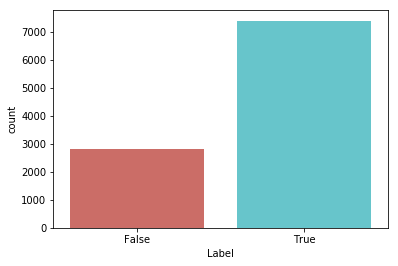

In [167]:
# PLotting train Data
plot_count(trainData)

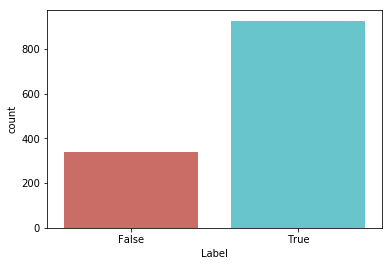

In [168]:
# PLotting the testing Data
plot_count(testData)

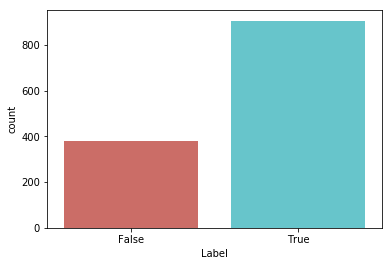

In [169]:
# Plotting Validation Data
plot_count(validData)

In [170]:
''' Topic : One - Hot Encoding of the Given Columns
    The new colomns as explained below are attached in the previous data frame
    and are saved in a new folder named as encoded dataset.
    
    Old Colmns      -  Encoded colmns
    1. job title    -    job_id
    2. Party_aff    -   party_id
    3. State_info   -   state_id
    4. Subject      -   subject_id
    5. venue        -   venue_id
    6. Speaker      -   speaker_id '''

' Topic : One - Hot Encoding of the Given Columns\n    The new colomns as explained below are attached in the previous data frame\n    and are saved in a new folder named as encoded dataset.\n    \n    Old Colmns      -  Encoded colmns\n    1. job title    -    job_id\n    2. Party_aff    -   party_id\n    3. State_info   -   state_id\n    4. Subject      -   subject_id\n    5. venue        -   venue_id\n    6. Speaker      -   speaker_id '

In [171]:
''' Creating Encoded colmn Label_id for the Label colmn '''
labels_dict = {True:1,False:0} # Mapping True and False with Integer Value 
label_reverse_arr = [True,False] # For reverse Mapping

''' Creating Colmn of Label_id for the Train, Test and Valid Dataset '''
trainData['Label_id'] = trainData['Label'].apply(lambda x: labels_dict[x]) 
validData['Label_id'] = validData['Label'].apply(lambda x: labels_dict[x])
testData['Label_id'] = testData['Label'].apply(lambda x: labels_dict[x])

In [172]:
''' Uncomment to see the Label_id Colmn
    validData.head() ''' 

' Uncomment to see the Label_id Colmn\n    validData.head() '

In [173]:
''' Creating Encoded colmn speaker_id for the Label Speaker '''
    
''' Given Dataset contains more then 200 Speakers, hence Shorlisting some from the given pool '''
speakers = ['barack-obama', 'donald-trump', 'hillary-clinton', 'mitt-romney', 
            'scott-walker', 'john-mccain', 'rick-perry', 'chain-email', 
            'marco-rubio', 'rick-scott', 'ted-cruz', 'bernie-s', 'chris-christie', 
            'facebook-posts', 'charlie-crist', 'newt-gingrich', 'jeb-bush', 
            'joe-biden', 'blog-posting','paul-ryan']

''' To store the mapping of each Speaker with an Integer Value'''
speaker_dict = {}
for cnt,speaker in enumerate(speakers):
    speaker = speaker.lower()
    speaker_dict[speaker] = cnt
    
''' Uncomment to print the dictionary 
    print(speaker_dict) '''

''' Function defined to Create Encoded Colomn speaker_id'''
def map_speaker(speaker):
    basestring=(str,bytes)
    if isinstance(speaker,basestring):
        speaker = speaker.lower()
        matches = [s for s in speakers if s in speaker]
        
        if len(matches) > 0:
            return speaker_dict[matches[0]]
        else:
            return len(speakers)
    else:
        return len(speakers)

In [174]:
''' Creating Encoded colmn job_id for the Label job title '''
    
''' Given Dataset contains many jobs type, hence Shorlisting some from the given pool '''
job_list = ['president', 'u.s. senator', 'governor', 'president-elect', 'presidential candidate', 
            'u.s. representative', 'state senator', 'attorney', 'state representative', 'congress']

''' To store the mapping of each Speaker with an Integer Value'''
job_dict = {}
for cnt,job in enumerate(job_list):
    job = job.lower()
    job_dict[job] = cnt

''' Function defined to Create Encoded Colomn job_id'''
def map_job(job):
    basestring=(str,bytes)
    if isinstance(job,basestring):
        job = job.lower()
        matches = [s for s in job_list if s in job]
        
        if len(matches) > 0:
            return job_dict[matches[0]]
        else:
            return 10
    else:
        return 10


In [175]:
''' Creating Encoded colmn party_id for the Label Party_aff '''
    
''' Shortlisting some Parties from the given pool '''
party_list = trainData['Party_aff'].value_counts()
party_dict = {'republican':0,'democrat':1,'none':2,'organization':3,'newsmaker':4}

''' Function defined to Create Encoded Colomn party_id'''
def map_party(party):
    if party in party_dict:
        return party_dict[party]
    else:
        return 5

In [176]:
''' Creating Encoded colmn state_id for the colmn State'''

''' Given Dataset contains many sates type, hence Shorlisting some from the given pool '''
states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado',
         'Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho', 
         'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana',
         'Maine' 'Maryland','Massachusetts','Michigan','Minnesota',
         'Mississippi', 'Missouri','Montana','Nebraska','Nevada',
         'New Hampshire','New Jersey','New Mexico','New York',
         'North Carolina','North Dakota','Ohio',    
         'Oklahoma','Oregon','Pennsylvania','Rhode Island',
         'South  Carolina','South Dakota','Tennessee','Texas','Utah',
         'Vermont','Virginia','Washington','West Virginia',
         'Wisconsin','Wyoming']

''' To store the mapping of each Speaker with an Integer Value'''
states_dict = {}
for cnt,state in enumerate(states):
    state = state.lower()
    states_dict[state] = cnt
# print(states_dict)
''' Function defined to Create Encoded Colomn state_id'''
def map_state(state):
    basestring = (str,bytes)
    if isinstance(state, basestring):
        state = state.lower()
        if state in states_dict:
            return states_dict[state]
        else:
            if 'Washington' in state:
                return states_dict['Washington']
            else:
                return 50 
    else:
        return 50


In [177]:
''' Creating Encoded colmn state_id for the colmn Subject'''

''' Given Dataset contains many subjects type, hence Shorlisting some from the given pool '''
subject_list = ['health','tax','immigration','election','education',
'candidates-biography','economy','gun','jobs','federal-budget','energy','abortion','foreign-policy']

''' To store the mapping of each Speaker with an Integer Value'''
subject_dict = {}
for cnt,subject in enumerate(subject_list):
    subject = subject.lower()
    subject_dict[subject] = cnt

''' Function defined to Create Encoded Colomn state_id'''
def map_subject(subject):
    basestring = (str,bytes)
    if isinstance(subject, basestring):
        subject = subject.lower()
        matches = [s for s in subject_list if s in subject]
        if len(matches) > 0:
            return subject_dict[matches[0]] #Return index of first match
        else:
            return 13 #This maps any other subject to index 13
    else:
        return 13 #Nans or un-string data goes here.

In [178]:
''' Creating Encoded colmn venue_id for the colmn venue'''

''' Given Dataset contains many venues type, hence Shorlisting some from the given pool '''

venue_list = ['news release','interview','tv','radio',
              'campaign','news conference','press conference','press release',
              'tweet','facebook','email']

''' To store the mapping of each venue with an Integer Value'''
venue_dict = {}
for cnt,venue in enumerate(venue_list):
    venue = venue.lower()
    venue_dict[venue] = cnt

''' Function defined to Create Encoded Colomn venue_id'''
def map_venue(venue):
    basestring = (str,bytes)
    if isinstance(venue, basestring):
        venue = venue.lower()
        matches = [s for s in venue_list if s in venue]
        if len(matches) > 0:
            return venue_dict[matches[0]] #Return index of first match
        else:
            return 11 #This maps any other venue to index 11
    else:
        return 11 #Nans or un-string data goes here.

In [179]:
''' Tokenizing each statement from the Colmn Statement and 
    Saving the pickle file in the directory '''

#Tokenize statement and vocab test
vocab_dict = {}

''' Using os module to read if an pickle file already 
    exists otherwise creating a new File'''
if not os.path.exists('./Pickle File/vocab.p'):
    t = Tokenizer()
    t.fit_on_texts(trainData['Statement'])
    vocab_dict = t.word_index
    cpickle.dump( t.word_index, open( "vocab.p", "wb" ))
    print('Vocab dict is created')
    print('Saved vocab dict to pickle file')
else:
    print('Loading vocab dict from pickle file')
    vocab_dict = cpickle.load(open("./Pickle File/vocab.p", "rb" ))

Loading vocab dict from pickle file


In [180]:
''' Processing the Statement Colomn '''
def prepocess_statement(statement):
    text = text_to_word_sequence(statement)
    val = [0] * 10
    val = [vocab_dict[t] for t in text if t in vocab_dict]
    return val

In [181]:
''' Function for preprocessing for the train,test and validation Dataset '''
def preprocesing(data):
    data['job_id'] = data['job title'].apply(map_job) #Job
    data['party_id'] = data['Party_aff'].apply(map_party) #Party
    data['state_id'] = data['State_info'].apply(map_state) #State
    data['subject_id'] = data['Subject'].apply(map_subject) #Subject
    data['venue_id'] = data['venue'].apply(map_venue) #Venue
    data['speaker_id'] = data['Speaker'].apply(map_speaker) #Speaker
    data['word_ids'] = data['Statement'].apply(prepocess_statement)

In [182]:
''' Get all preprocessing done for the train,test and validation Dataset '''
preprocesing(trainData)
preprocesing(validData)
preprocesing(testData)

In [183]:
trainData.head()

,Label,Statement,Subject,Speaker,job title,State_info,Party_aff,venue,Label_id,job_id,party_id,state_id,subject_id,venue_id,speaker_id,word_ids
0,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,a mailer,0,8,0,41,11,11,20,"[7, 1, 6968, 1141, 520, 621, 385, 444, 5119, 5..."
1,True,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,a floor speech.,1,10,1,44,10,11,20,"[63, 164, 1, 2091, 3, 964, 866, 23, 602, 63, 1..."
2,True,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,Denver,1,0,1,12,12,11,0,"[127, 101, 3546, 24, 191, 254, 20, 329, 4, 343..."
3,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,a news release,0,10,2,50,0,0,18,"[32, 43, 266, 298, 10, 666, 4, 667, 404, 467, ..."
4,True,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,an interview on CNN,1,10,1,8,6,1,14,"[1, 325, 4149, 602, 38, 1, 408, 3, 174, 505]"


In [184]:
testData.head()

,Label,Statement,Subject,Speaker,job title,State_info,Party_aff,venue,Label_id,job_id,party_id,state_id,subject_id,venue_id,speaker_id,word_ids
0,True,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,Radio interview,1,2,0,41,2,1,6,"[685, 5, 456, 11, 1, 55, 56, 407, 313, 53, 249..."
1,False,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,a news conference,0,8,1,47,8,5,20,"[96, 10, 11, 2281, 4, 708, 1, 216, 3, 2476, 50..."
2,False,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,comments on ABC's This Week.,0,0,0,30,13,11,1,"[7, 191, 254, 12, 496, 462, 4, 413, 1, 6881]"
3,True,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,a radio show,1,10,0,35,13,3,20,"[5971, 5972, 385, 5, 93, 9, 53, 103, 958, 8, 1..."
4,False,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,a web video,0,10,1,47,13,11,20,"[63, 652, 20, 5, 11380, 440, 566, 38, 1, 1094,..."


In [185]:
validData.head()

,Label,Statement,Subject,Speaker,job title,State_info,Party_aff,venue,Label_id,job_id,party_id,state_id,subject_id,venue_id,speaker_id,word_ids
0,True,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,an interview with ABC17 News,1,5,0,23,6,1,20,"[19, 13, 170, 109, 314, 85, 16, 2, 1, 8783]"
1,False,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,NaN,0,10,2,50,13,11,7,"[63, 27, 17, 3946, 107, 122, 36, 164, 29, 267,..."
2,False,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,a U.S. Ways and Means hearing,0,5,1,35,1,11,20,"[7, 605, 1928, 26, 268, 184, 651, 1928, 6, 319..."
3,True,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,an opinion article,1,10,2,35,13,11,20,"[7, 150, 171, 3, 1383, 232, 15, 914]"
4,True,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,interview with CBS News,1,0,1,12,6,1,0,"[11, 819, 20, 208, 9, 3211, 554, 2, 1, 325, 25..."


In [186]:
# Saving csv File in the Directory
trainData.to_csv('train_data.csv', sep='\t', encoding='utf-8',index=False)
testData.to_csv('test_data.csv', sep='\t', encoding='utf-8',index=False)
validData.to_csv('valid_data.csv', sep='\t', encoding='utf-8',index=False)

In [187]:
'''Initializing the Hyper Parameters'''
vocab_length = len(vocab_dict.keys())
hidden_size = 100 #Has to be same as EMBEDDING_DIM
lstm_size = 100
num_steps = 25
num_epochs = 30
batch_size = 40

#Meta data related hyper params
num_party = 6
num_state = 51
num_venue = 12
num_job = 11
num_sub = 14
num_speaker = 21

In [188]:
''' Filtering the x_train and y_train from the Dataset'''
x_train = trainData['word_ids']
y_train = trainData['Label_id']
x_val = validData['word_ids']
y_val = validData['Label_id']
x_test = testData['word_ids']
y_test = testData['Label_id']

''' Making all of the Vectors to of same size '''
x_train = sequence.pad_sequences(x_train, maxlen=num_steps, padding='post',truncating='post')
y_train = keras.utils.to_categorical(y_train, num_classes=6)
x_val = sequence.pad_sequences(x_val, maxlen=num_steps, padding='post',truncating='post')
y_val = keras.utils.to_categorical(y_val, num_classes=6)
x_test = sequence.pad_sequences(x_test, maxlen=num_steps, padding='post',truncating='post')

In [189]:
''' Making One-Hot Encoding of the Rest of the colomns'''
feature1 = to_categorical(trainData['party_id'],num_classes=num_party)
feature2  = to_categorical(trainData['state_id'],num_classes=num_state)
feature3  = to_categorical(trainData['venue_id'],num_classes=num_venue)
feature4  = to_categorical(trainData['job_id'],num_classes=num_job)
feature5  = to_categorical(trainData['subject_id'],num_classes=num_sub)
feature6  = to_categorical(trainData['speaker_id'],num_classes=num_speaker)
    
''' Stacking the Rest of the converted Colomn and Making a new Train Data'''
X_train_meta = np.hstack((feature1,feature2,feature3,feature4,feature5,feature6))#concat a and b

In [190]:
''' Making One-Hot Encoding of the Rest of the colomns'''
feature1 = to_categorical(testData['party_id'],num_classes=num_party)
feature2  = to_categorical(testData['state_id'],num_classes=num_state)
feature3  = to_categorical(testData['venue_id'],num_classes=num_venue)
feature4  = to_categorical(testData['job_id'],num_classes=num_job)
feature5  = to_categorical(testData['subject_id'],num_classes=num_sub)
feature6  = to_categorical(testData['speaker_id'],num_classes=num_speaker)
    
''' Stacking the Rest of the converted Colomn and Making a new Test Data'''
X_test_meta = np.hstack((feature1,feature2,feature3,feature4,feature5,feature6))#concat a and b

In [191]:
''' Making One-Hot Encoding of the Rest of the colomns'''
feature1 = to_categorical(validData['party_id'],num_classes=num_party)
feature2  = to_categorical(validData['state_id'],num_classes=num_state)
feature3  = to_categorical(validData['venue_id'],num_classes=num_venue)
feature4  = to_categorical(validData['job_id'],num_classes=num_job)
feature5  = to_categorical(validData['subject_id'],num_classes=num_sub)
feature6  = to_categorical(validData['speaker_id'],num_classes=num_speaker)

''' Stacking the Rest of the converted Colomn and Making a new Valid Data'''
X_valid_meta = np.hstack((feature1,feature2,feature3,feature4,feature5,feature6))#concat a and b

In [194]:
''' Using Glove Vector to achieve the Vector for each statement'''
embedding_index = {}

''' Reading the Glove text from the Directory'''
with open("../glove.6B.100d.txt") as fp:
    for line in fp:
        values = line.split()
        vectors = np.asarray(values[1:],dtype='float32')
        embedding_index[values[0].lower()] = vectors
print("Found %s word vectors"%len(embedding_index))

Found 400000 word vectors


In [195]:
''' Setting Constant for Dimention to 100 '''
EMBEDDING_DIM = 100

'''Creating Embedding Matrix and adding the Vector '''
num_words = len(vocab_dict) + 1
embedding_matrix = np.zeros((num_words,EMBEDDING_DIM))

for word, i in vocab_dict.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_index = None